# Intsalling **COCOAPI** 
### for Windows

- Instal Cython 
> `pip install Cython`
- Install Visual C++ 2015 Build Tools from https://go.microsoft.com/fwlink/?LinkId=691126 with default selection.
- Go to C:\Program Files (x86)\Microsoft Visual C++ Build Tools and run:
> vcbuildtools_msbuild.bat
- In a jupyter notebook run:

> `pip install git+https://github.com/philferriere/cocoapi.git#egg=pycocotools^&subdirectory=PythonAPI`

 

`!py -3.7 -m pip install Cython`

`pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI`

## Downloading the data

Download some specific data from here: http://cocodataset.org/#download (described below)
Under Annotations, download:
> Annotations:
- 2014 Train/Val annotations [241MB] (extract captions_train2014.json and captions_val2014.json, and place at locations cocoapi/annotations/captions_train2014.json and cocoapi/annotations/captions_val2014.json, respectively)
- 2014 Testing Image info [1MB] (extract image_info_test2014.json and place at location cocoapi/annotations/image_info_test2014.json)
Under Images, download:

> Images: 
- 2014 Train images [83K/13GB] (extract the train2014 folder and place at location cocoapi/images/train2014/)
- 2014 Val images [41K/6GB] (extract the val2014 folder and place at location cocoapi/images/val2014/)
- 2014 Test images [41K/6GB] (extract the test2014 folder and place at location cocoapi/images/test2014/)

# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [9]:
import os
import sys
# address of the folder with PythonAPI in it
sys.path.append(r'D:\Google Drive\Jupyter Notebooks\Udaicity - Computer Vision\Project 2 - Image-Captioning-Project-master\cocoapi\PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = r'D:\Videos\coco' # address of the folder with COCO data in it
dataType = 'val2014'

instances_annFile = os.path.join(dataDir, 'annotations\instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations\captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=8.16s)
creating index...
index created!
loading annotations into memory...
Done (t=0.44s)
creating index...
index created!


In [10]:
# number of annotations
len(ids)

291875

In [11]:
# 10 first ids 
ids[:10]

[156, 509, 603, 918, 1072, 1727, 1728, 1767, 1768, 1769]

## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

In [4]:
# example of getting an image id
coco.anns[156]['image_id']

558840

http://images.cocodataset.org/val2014/COCO_val2014_000000130909.jpg


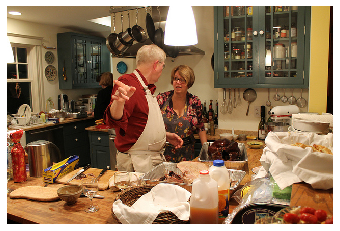

A man in a kitchen instructing a woman on what to do 
A man and a woman talking to one another in a kitchen with a lot of food
a man talking to a woman in a kitchen with a lot of food in it
A man and woman talking in the kitchen.
A man with an apron on and a woman standing in a messy kitchen. 


In [6]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)